In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_train.csv")
print('Number of training sentences: ', len(df))
df.sample(5)

In [ ]:
tweets = df.text.values
labels = df.target.values
for label in labels:
    print(label)

In [ ]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
print(' Original: ', tweets[1], labels[1])
print('Tokenized: ', tokenizer.tokenize(tweets[1]))
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[1])))

In [ ]:

print(' Original: ', tweets[-1])
print('   Target: ', labels[-1])
print('Tokenized: ', tokenizer.tokenize(tweets[-1]))

In [ ]:
import re

tweets = [" ".join([word if '@' not in word else "@" for word in t.split()]) for t in tweets]
print(tweets[-1])

In [89]:

import numpy as np

encoded_tweets = [tokenizer.encode(t) for t in tweets]
lens = np.array([len(t) for t in encoded_tweets])

print('# of sentences:', len(tweets))
print('Max sentence length: ', max(lens))
print('Avg sentence length: ', np.mean(lens))
print('Median sentence length: ', np.median(lens))

# of sentences: 30381
Max sentence length:  152
Avg sentence length:  27.29844310588855
Median sentence length:  26.0


<BarContainer object of 87 artists>

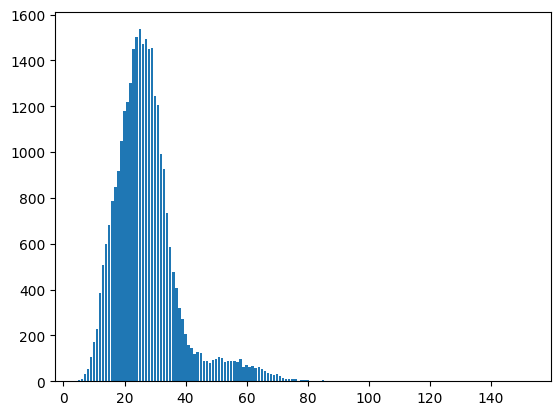

In [90]:
import matplotlib.pyplot as plt

unique = list(set(lens))
unique.sort()
cnt = [sum([1 if l==u else 0 for l in lens]) for u in unique]
plt.bar(unique, cnt)
     

In [91]:
def encode(sentences, labels, tokenizer, max_len):
    encoded_dicts = [tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_len,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                     ) for sent in sentences]
    input_ids = [d['input_ids'] for d in encoded_dicts]  
    attention_masks = [d['attention_mask'] for d in encoded_dicts]  

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    return input_ids, attention_masks, labels

In [92]:
input_ids, attention_masks, labels = encode(tweets, labels, tokenizer, max_len=200)
print('Original: ', tweets[0])
print('\nToken IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\esgpe\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.